In [1]:
import pandas as pd
import bs4
from bs4 import BeautifulSoup  
import csv
import numpy as np
import matplotlib.pyplot as plt      
from datetime import datetime
from datetime import timedelta
import sklearn
from sklearn import preprocessing, linear_model, model_selection
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error ,mean_absolute_error
import matplotlib.pyplot as plt  
import numpy as np
import seaborn as sns


In [2]:
### LinearRegression()
def load_dataset(df, label_column):
    y = df[label_column]
    X = df.drop(label_column, axis=1)
    return X, y


def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(X_train_scaled, y_train):
    reg = LinearRegression().set_params(fit_intercept = True ,normalize = True)
    reg.fit(X_train_scaled, y_train)
    return reg

def predict_model(X_test_scaled,y_test , reg):
    y_pred = reg.predict(X_test_scaled)
    # create a dataframe with the results
    result = pd.DataFrame({'Actual': y_test, 'Predicted':  np.round(y_pred)})
 
    return y_pred, result


def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

def tune_model(X_train_scaled, y_train):
    params = {'fit_intercept': [True, False], 'normalize': [True, False]}
    grid_search_cv = GridSearchCV(LinearRegression(), params, n_jobs=-1, verbose=1, cv=5)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_params = grid_search_cv.best_params_
    best_score = grid_search_cv.best_score_
    return best_params, best_score

def return_best_model(X_train_scaled, X_test_scaled, y_train, y_test, best_params):
    reg = LinearRegression(**best_params)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    return reg, y_pred

def Remove_outliers(df):
    for col in df.select_dtypes(include=['float64','int']).columns:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [3]:
### LinearRegression() with params
def load_dataset(df, label_column):
    y = df[label_column]
    X = df.drop(label_column, axis=1)
    return X, y


def data_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test



def train_model(X_train_scaled, y_train):
    reg = LinearRegression(normalize=True,fit_intercept= True)
    reg.fit(X_train_scaled, y_train)
    return reg

def predict_model(X_test_scaled,y_test , reg):
    y_pred = reg.predict(X_test_scaled)
    # create a dataframe with the results
    result = pd.DataFrame({'Actual': y_test, 'Predicted':  np.round(y_pred)})
    print(f"R2_Score ={reg.score(X_test_scaled,y_test)}")
 
    return y_pred, result


def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, r2

def tune_model(X_train_scaled, y_train):
    params = {'fit_intercept': [True, False], 'normalize': [True, False]}
    grid_search_cv = GridSearchCV(LinearRegression(), params, n_jobs=-1, verbose=1, cv=5)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_params = grid_search_cv.best_params_
    best_score = grid_search_cv.best_score_
    print(grid_search_cv.best_estimator_)

    return best_params, best_score

def return_best_model(X_train_scaled, X_test_scaled, y_train, y_test, best_params):
    reg = LinearRegression(**best_params)
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    return reg, y_pred

def Remove_outliers(df):
    for col in df.select_dtypes(include=['float64','int']).columns:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df



(26377, 12)
R2_Score =0.6015251793000211
Fitting 5 folds for each of 4 candidates, totalling 20 fits
LinearRegression(normalize=True)
Best Parameters: {'fit_intercept': True, 'normalize': True}
Best Score: 0.5955586873190669
MAE: 523081.7114120462
R2: 0.6015251793000211


,DATE,DEALAMOUNT,BUILDINGYEAR,BUILDINGFLOORS,NEIGHBORHOOD,ROOMNUM,FLOOR,ASSETMETER,long,lat,Distance_From_Sea,AVG_ROOM_SIZE
0,2022,2019000.0,1970,4.0,0,4.0,5.0,70.0,661887.8100,182342.5000,5108.0,280.0
1,2022,3410000.0,1940,2.0,1,4.0,2.0,94.0,661229.1900,178777.2000,1936.0,376.0
4,2022,3200000.0,1950,1.0,1,3.5,1.0,74.0,661382.8800,179405.0900,2483.0,259.0
6,2022,4555000.0,2020,3.0,3,3.0,4.0,67.0,662899.6613,178612.8646,1250.0,201.0
7,2022,4555000.0,2020,3.0,3,3.0,4.0,67.0,662912.1833,178610.7625,1244.0,201.0


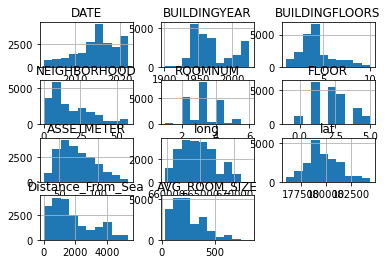

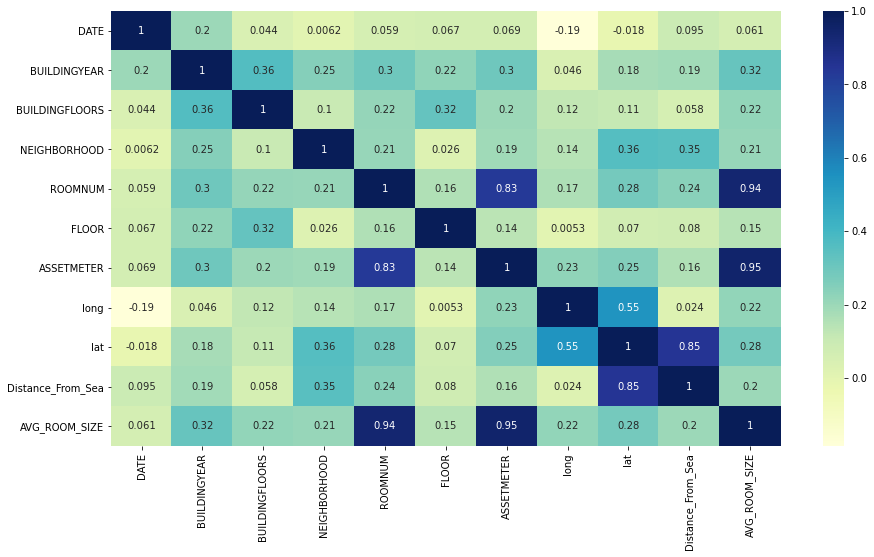

In [4]:
df = pd.read_csv("Data/Real_Estate_TLV_Numric_Data.csv",index_col=0)

df = Remove_outliers(df)
# df.drop(['NEIGHBORHOOD'],axis =1 , inplace =True)

# df = df[df['DATE'] >= 2019]
print(df.shape)

df.drop(['AVG_SALARY'],axis =1 , inplace =True)

#Feature Engineering
df['AVG_ROOM_SIZE'] = (df["ASSETMETER"] * df['ROOMNUM']).round(1)
# df['Slaray_sea_Raio'] = (df['AVG_SALARY'] * df['Distance_From_Sea']) / 1000
df.head()
# # 1. Split Data to Train and Test

label_column = "DEALAMOUNT"
X , y = load_dataset(df,label_column)
X_train, X_test, y_train, y_test = data_split(X, y)


#2. Normalize Data
X_train_scaled, X_test_scaled = normalize_data(X_train, X_test)

#3. Train Model
reg = train_model(X_train, y_train)

# #4. Predict Model
y_pred , model = predict_model(X_test,y_test, reg)



#5. Evaluate Model
mae, r2 = evaluate_model(y_test, y_pred)

#6. Tune Model
best_params, best_score = tune_model(X_train_scaled, y_train)

#7. Return Best Model
reg, y_pred = return_best_model(X_train_scaled, X_test_scaled, y_train, y_test, best_params)
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("MAE:", mae)
print("R2:", r2)

X_train.hist()
plt.figure(figsize=(15,8))
sns.heatmap(X_train.corr(), annot =True ,cmap ='YlGnBu')
df.head()

In [5]:
def rename_yad2_df(df):
    df.rename(columns={'price':'DEALAMOUNT'}, inplace=True)
    df.rename(columns={'neighborhood':'NEIGHBORHOOD'}, inplace=True)
    df.rename(columns={'buildingMR':'ASSETMETER'}, inplace=True)
    df.rename(columns={'TotalFloors':'BUILDINGFLOORS'}, inplace=True)
    df.rename(columns={'floor':'FLOOR'}, inplace=True)
    df.rename(columns={'buildyear':'BUILDINGYEAR'}, inplace=True)
    df.rename(columns={'year':'DATE'}, inplace=True)
    df.rename(columns={'rooms':'ROOMNUM'}, inplace=True)
#     df = df.reindex(columns=["DATE", "DEALAMOUNT", "BUILDINGYEAR", "BUILDINGYEAR", "BUILDINGFLOORS",
#                               "NEIGHBORHOOD", "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"])
    return df

def preprocess_dataframe(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df.drop(['parking', 'balconies','shelter','on_pillars','storeroom','asset_classification','elevator','home_number'], axis=1 , inplace=True )
#     df['AVG_ROOM_SIZE'] = (df["buildingMR"] / df['rooms']).round(1)
    df = rename_yad2_df(df)
    
    df['BUILDINGFLOORS'] = df['BUILDINGFLOORS'].astype(int)

    
    
    # Remove columns with only one unique value
#     unique_counts = df.nunique()
#     cols_to_drop = unique_counts[unique_counts == 1].index
#     df = df.drop(cols_to_drop, axis=1)

    # Remove outliers
    for col in df.select_dtypes(include=['float64','int']).columns:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df


def recommend_affordable_apartments(df, model):
    X, y = load_dataset(df, "DEALAMOUNT")
    
    # We dont need the the second params so we will call it '_'
    X_scaled, _ = normalize_data(X, X)
    
    
    # Predict prices using the trained model
    y_pred = model.predict(X_scaled)
    df["PREDICTED_PRICE"] = y_pred
    df["PREDICTED_PRICE"] = df["PREDICTED_PRICE"].astype(int)
    df['difference'] =  df["DEALAMOUNT"] -  df["PREDICTED_PRICE"] 
    
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'r2_score: {r2} , mae: {mae}')

    return df.sort_values(by="difference")

yad2_df = pd.read_csv("Data/Real_Estate_TLV_YAD2_Numeric.csv",index_col=0)
# yad2_df.drop(['neighborhood'],axis =1 , inplace =True)
# yad2_df =yad2_df.dropna()
# yad2_df['year'] = 2022
yad2_df = preprocess_dataframe(yad2_df)

yad2_df = yad2_df.reindex(columns=["DATE", "DEALAMOUNT", "BUILDINGYEAR", "BUILDINGFLOORS",
                              "NEIGHBORHOOD", "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"])
yad2_df = yad2_df[np.isfinite(yad2_df["ASSETMETER"] / yad2_df['ROOMNUM'])]
yad2_df['AVG_ROOM_SIZE'] = (yad2_df["ASSETMETER"] / yad2_df['ROOMNUM']).round(1)
yad2_df['AVG_ROOM_SIZE'] = yad2_df['AVG_ROOM_SIZE'].astype(int)

# yad2_df = yad2_df.replace([np.inf, -np.inf], np.nan)
yad2_df

,DATE,DEALAMOUNT,BUILDINGYEAR,BUILDINGFLOORS,NEIGHBORHOOD,ROOMNUM,FLOOR,ASSETMETER,long,lat,Distance_From_Sea,AVG_ROOM_SIZE
1,2023,4890000,2016,1,1,4,0,200,668361.0,183044.0,4349,50
2,2023,16700000,2021,12,2,5,11,230,667737.0,180140.0,1424,46
3,2023,8300000,1969,8,3,6,3,165,670131.0,181703.0,2212,27
4,2023,4900000,2018,4,4,3,1,75,665688.0,179795.0,1830,25
5,2023,8590000,1950,6,5,4,5,115,666836.0,179887.0,1492,28
...,...,...,...,...,...,...,...,...,...,...,...,...
266,2023,2250000,1950,3,17,3,3,95,664963.0,178567.0,771,31
268,2023,3250000,2013,8,22,3,3,73,662738.0,179607.0,2751,24
270,2023,3300000,1950,4,50,3,4,86,662436.0,178611.0,1783,28
271,2023,5100000,1982,6,18,4,2,115,670214.0,181885.0,2379,28


In [6]:
affordable_deals = recommend_affordable_apartments(yad2_df, reg)
affordable_deals

r2_score: -1.9412616909740747 , mae: 4317203.349838605


,DATE,DEALAMOUNT,BUILDINGYEAR,BUILDINGFLOORS,NEIGHBORHOOD,ROOMNUM,FLOOR,ASSETMETER,long,lat,Distance_From_Sea,AVG_ROOM_SIZE,PREDICTED_PRICE,difference
141,2023,1000000,1976,3,9,3,2,60,663247.0,178206.0,1032,20,250360,749640
58,2023,1400000,2015,5,19,2,2,60,664691.0,178234.0,511,30,495918,904082
159,2023,1500000,1960,4,17,2,-1,43,665035.0,179275.0,1513,21,144624,1355376
233,2023,1490000,1974,4,4,1,-1,31,665682.0,180103.0,2168,31,-15641,1505641
222,2023,970000,1955,1,21,2,1,50,662282.0,179050.0,2320,25,-566981,1536981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2023,16700000,2021,12,2,5,11,230,667737.0,180140.0,1424,46,1873443,14826557
9,2023,16000000,2022,4,9,4,4,194,663540.0,178218.0,934,48,896116,15103884
195,2023,19000000,1952,7,11,4,7,202,667152.0,179051.0,461,50,1398951,17601049
157,2023,18500000,2009,2,29,4,2,236,662732.0,177847.0,839,59,655420,17844580


In [7]:
affordable_deals.sort_values(by="difference" , ascending=True )

affordable_deals = affordable_deals.reindex(columns=["DATE", "DEALAMOUNT",'PREDICTED_PRICE','difference', "BUILDINGYEAR", "BUILDINGFLOORS",
                               "ROOMNUM", "FLOOR", "ASSETMETER", "long", "lat", "Distance_From_Sea"])
#NEIGHBORHOOD
affordable_deals[10:70]

,DATE,DEALAMOUNT,PREDICTED_PRICE,difference,BUILDINGYEAR,BUILDINGFLOORS,ROOMNUM,FLOOR,ASSETMETER,long,lat,Distance_From_Sea
177,2023,1530000,-506579,2036579,1965,4,3,2,65,660687.0,177510.0,1253
200,2023,1990000,-221195,2211195,1970,4,2,2,47,661793.0,177021.0,299
113,2023,4000000,1741731,2258269,2014,13,5,6,125,668834.0,180426.0,1317
180,2023,1200000,-1062774,2262774,1994,4,1,4,91,661480.0,177336.0,761
69,2023,1400000,-1005521,2405521,1950,3,1,3,36,661841.0,179005.0,2440
209,2023,1500000,-923911,2423911,1930,3,1,1,27,662233.0,179005.0,2290
154,2023,2890000,393437,2496563,1951,4,2,4,41,665789.0,179330.0,1285
160,2023,2290000,-238730,2528730,2000,4,3,3,52,660115.0,176878.0,784
208,2023,2100000,-472408,2572408,1960,4,3,1,75,660123.0,177132.0,1058
90,2023,2450000,-158881,2608881,2022,5,3,1,50,660431.0,176515.0,268
